In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract
import easyocr

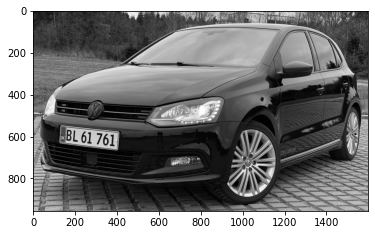

In [2]:
#Loads the image
img = cv2.imread('../images/polo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

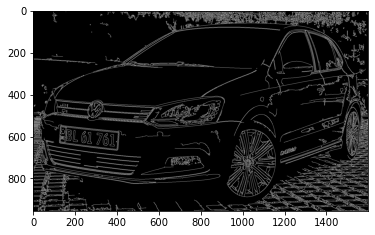

In [3]:
#Makes a noise reduction filter
noise_filter = cv2.bilateralFilter(gray, 20, 20, 20)

#Finds edges
edged_image = cv2.Canny(noise_filter, 50, 200)

#Display image
plt.imshow(cv2.cvtColor(edged_image, cv2.COLOR_BGR2RGB))

In [4]:
#Finds contours
keypoints = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort contours from big to small

In [5]:
numberplate = None
#Loops through contours 
for contour in contours:
    
    #Finds a rect shape contour with four sides
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        numberplate = approx
        break
numberplate

array([[[130, 549]],

       [[129, 631]],

       [[406, 659]],

       [[408, 575]]], dtype=int32)

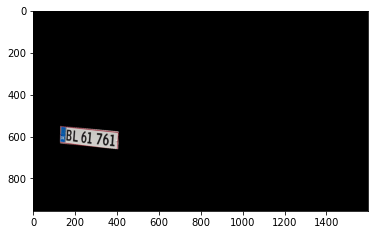

In [6]:
#Applies a mask that makes everything black except for the locations where the numberplate location is found
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [numberplate], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

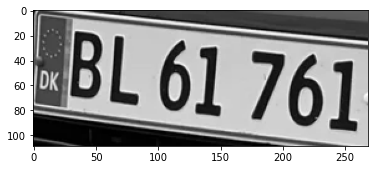

In [7]:
#Cropps the image using the mask so it finds the x1 and y1 where the numberplate starts and x2,y2 is the where it ends.
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2-1, y1:y2-10]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
#Easy ocr to find the text in image
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image, allowlist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789' ,detail=0)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [1]:
#If ocr finds more that one text it finds out if the text have a length of 7 and clean up spaces and [] in the words
text=""
if len(result)>1:
    for item in result:
        word=item.replace(' ', '')
        if len(word)==7:
            text=word
else:
    text=result[0].replace(' ', '')
    
print(text)

NameError: name 'result' is not defined

In [1]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install easyocr

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install pytorch torchvision -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /Users/vincent/opt/anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytorch-1.13.0             |          py3.9_0        74.6 MB  pytorch
    torchvision-0.14.0         |         py39_cpu         6.1 MB  pytorch
    ------------------------------------------------------------
                                           Total:        80.8 MB

The following NEW packages will be INSTALLED:

  pytorch            pytorch/osx-64::pytorch-1.13.0-py3.9_0 None
  torchvision        pytorch/osx-64::torchvision-0.14.0-py39_cpu None



torchvision-0.14.0   | 6.1 MB    | ##################################### | 100% 
pytorch-1.13.0       | 74.6 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing tran